In [1]:
from sympy import *
from sympy.solvers.solveset import linsolve
init_printing()
import numpy as np
t, T, epsilon = symbols('t T epsilon')

def Fun_t(f):
    return Function(f)(t)

def Fun_T(f):
    return Function(f)(T)

# Outer expansion

Define the outer series

\begin{align}
R_2 &= R_2^{(0)} + \varepsilon R_2^{(1)} + \varepsilon^2 R_2^{(2)} + \mathcal{O}(\varepsilon^3)\\
Q_2 &= Q_2^{(0)} + \varepsilon Q_2^{(1)} + \varepsilon^2 Q_2^{(2)} + \mathcal{O}(\varepsilon^3)\
\end{align}

In [2]:
R20,  R21, R22, Q20, Q21, Q22 = map(Fun_t,['R_2^{(0)}', 'R_2^{(1)}', 'R_2^{(2)}', 'Q_2^{(0)}', 'Q_2^{(1)}', 'Q_2^{(2)}'])
Ca_er, Ca_cyt, H_er, H_cyt = map(Fun_t,['Ca_er', 'Ca_cyt', 'H_er', 'H_cyt'])
R2 = R20 + epsilon*R21 + epsilon**2*R22 +Order(epsilon**3)
Q2 = Q20 + epsilon*Q21 + epsilon**2*Q22 +Order(epsilon**3)
q1p, q1m, q20p, q20m, q3p, q3m, q40p, q40m, q5p, q5m =  map(Fun_t,['q_1^+', 'q_1^-', 'q_{20}^+', 'q_{20}^-', 'q_3^+', 'q_3^-', 'q_{40}^+', 'q_{40}^-', 'q_5^+', 'q_5^-'])
Q1, Q4, Q5 = map(Fun_t,['Q_1', 'Q_4', 'Q_5'])
k1p, k2p, k3p, k1m, k2m, k3m = symbols('k_1^+ k_2^+ k_3^+ k_1^- k_2^- k_3^-')


## Outer ODEs

\begin{align}
\frac{dR_2}{dt}  &= q_1^+Q_1 + q_3^- Q_4 + (q_3^+ - q_1^-)Q_2 - q_3^+ R_2 \\
\frac{dQ_2}{dt}  &= q_{20}^- (R_2-Q_2) - q_{20}^+ Q_2 + \varepsilon(q_1^+Q_1-q_1^-Q_2)
\end{align}

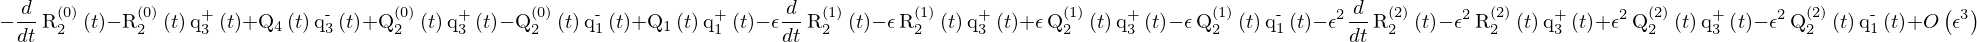

In [3]:
dR2dt = R2.diff(t)
dR2dt_expr = -dR2dt+ q1p*Q1 + q3m*Q4 + (q3p-q1m)*Q2-q3p*R2

dR2dt_expr.expand()

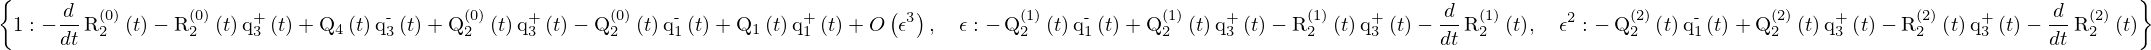

In [4]:
dR2_dt_by_order =  collect(dR2dt_expr.expand(),epsilon,evaluate=False)
dR2_dt_by_order

In [5]:
dR20_dt = solve(dR2_dt_by_order[1].removeO(),diff(R20,t))[0]
dR20_dt

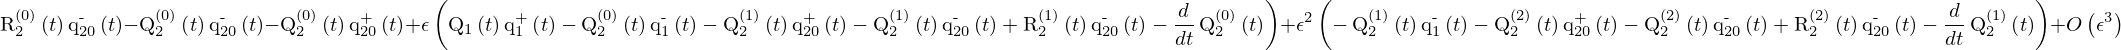

In [6]:
dQ2dt = Q2.diff(t)
dQ2dt_expr = -epsilon*dQ2dt +q20m*(R2-Q2)-q20p*Q2+epsilon*(q1p*Q1-q1m*Q2)
collect(dQ2dt_expr.expand(),epsilon,evaluate=True)



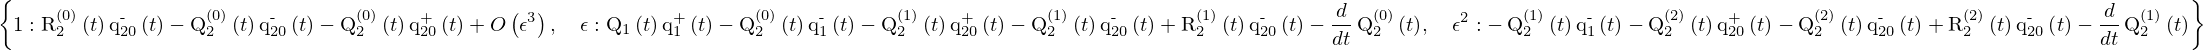

In [7]:
dQ2_dt_by_order = collect(dQ2dt_expr.expand(),epsilon,evaluate=False)
dQ2_dt_by_order

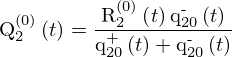

In [8]:
Q20_solution = solve(dQ2_dt_by_order[1].removeO(),Q20)
Eq(Q20,Q20_solution[0])

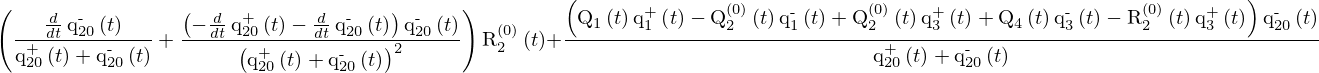

In [9]:
dQ20_solution_dt = Q20_solution[0]/R20*dR20_dt+ diff(Q20_solution[0]/R20) * R20
dQ20_solution_dt

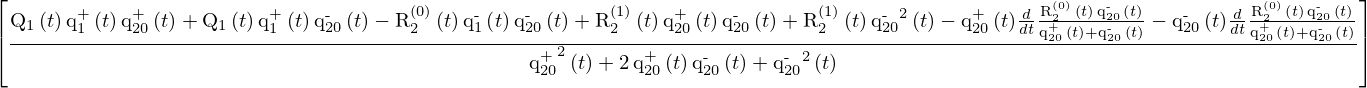

In [10]:
Q21_solution = solve(dQ2_dt_by_order[epsilon].subs(Q20,Q20_solution[0]),Q21)
Q21_solution

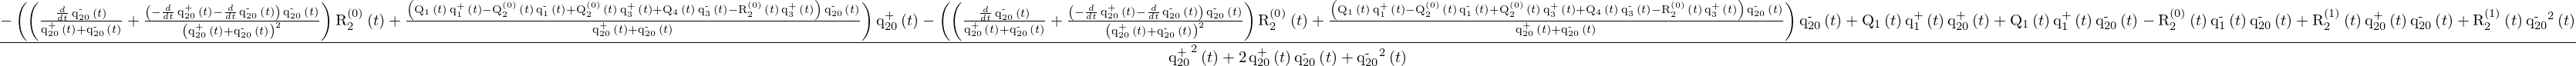

In [37]:
Q21_solution[0].replace(Derivative(R20*q20m/(q20p+q20m),t),dQ20_solution_dt)




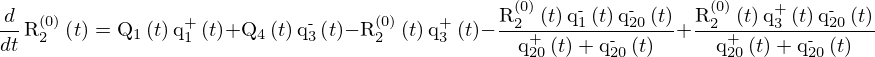

In [12]:
Eq(Derivative(R20,t),dR20_dt.subs(Q20,Q20_solution[0]))

### Dynamics of $R_2^1$

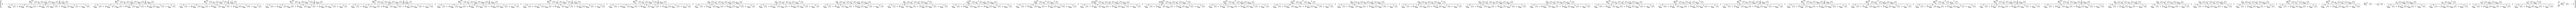

In [34]:
collect(dR2_dt_by_order[epsilon].subs(Q21,Q21_solution[0]).replace(Derivative(R20*q20m/(q20p+q20m),t),dQ20_solution_dt).expand(),R21,evaluate=False)


After substitution of $Q_2^{(0)}$,

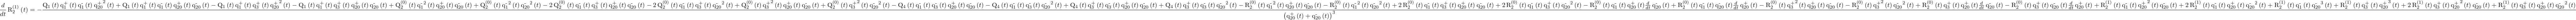

In [14]:
dR21_dt = factor(solve(R21_eqn,diff(R21,t))[0].replace(Derivative(R20*q20m/(q20p+q20m),t),dQ20_solution_dt))
Eq(Derivative(R21,t),dR21_dt)

### Re-assemble the ODE  $dR_2/dt$ up to $\mathcal{O}(\varepsilon)$

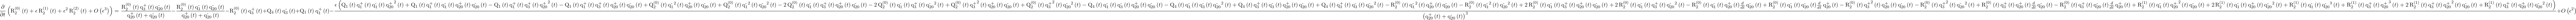

In [15]:
Eq(Derivative(R2,t),dR20_dt.subs(Q20,Q20_solution[0]) + epsilon*dR21_dt + Order(epsilon**2))

# Inner expansion

In [16]:
iR20,  iR21, iR22, iQ20, iQ21, iQ22 = map(Fun_T,['\\tilde{R}_2^{0}', '\\tilde{R}_2^{1}', '\\tilde{R}_2^{2}', '\\tilde{Q}_2^{0}', '\\tilde{Q}_2^{1}', '\\tilde{Q}_2^{2}'])
iR2 = iR20 + epsilon*iR21 + epsilon**2*iR22 +Order(epsilon**3)
iQ2 = iQ20 + epsilon*iQ21 + epsilon**2*iQ22 +Order(epsilon**3)

# actually the rate constants are slowly varying relative to Q on this time scale (should be constants)
iq1p, iq1m, iq20p, iq20m, iq3p, iq3m, iq40p, iq40m, iq5p, iq5m =  map(Fun_T,['q_1^+', 'q_1^-', 'q_{20}^+', 'q_{20}^-', 'q_3^+', 'q_3^-', 'q_{40}^+', 'q_{40}^-', 'q_5^+', 'q_5^-'])
iQ1, iQ4, iQ5 = map(Fun_T,['Q_1', 'Q_4', 'Q_5'])





## Inner ODEs

Consider the initial value problem for $t-t_0 \leq \mathcal{O}(\varepsilon)$. Let $T=(t-t_0)/\varepsilon = \mathcal{O}(1)$.

\begin{align}
\dfrac{d \widetilde{R}_2}{d T} &= \varepsilon\left(q_1^+Q_1 + q_3^- Q_4 + (q_3^+ - q_1^-)\widetilde{Q}_2 - q_3^+ \widetilde{R}_2 \right) \\
\dfrac{d \widetilde{Q}_2}{d T}&= q_{20}^- (\widetilde{R}_2-\widetilde{Q}_2) - q_{20}^+ \widetilde{Q}_2 + \varepsilon(q_1^+Q_1-q_1^-\widetilde{Q}_2)
\end{align}

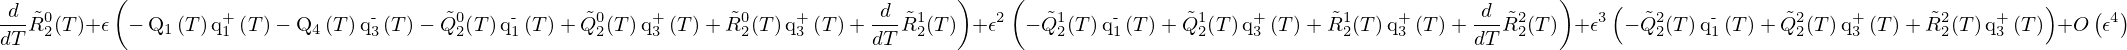

In [17]:
diR2_dt = iR2.diff(T)
diR2dt_expr = diR2_dt - epsilon*(iq1p *iQ1 + iq3m*iQ4 - (iq3p-iq1m)*iQ2 - iq3p*iR2)
diR2dt_expr.expand().collect(epsilon)

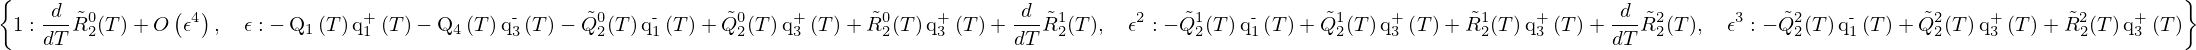

In [18]:
diR2_dt_by_order = diR2dt_expr.expand().collect(epsilon,evaluate=False)
diR2_dt_by_order

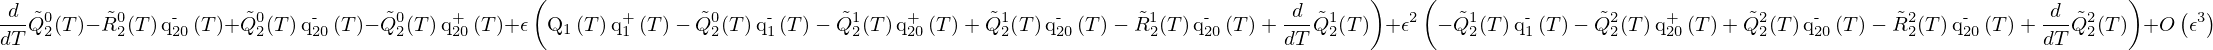

In [19]:
diQ2_dt = iQ2.diff(T)
diQ2dt_expr = diQ2_dt - iq20m*(iR2-iQ2) - iq20p*iQ2 + epsilon*(iq1p*iQ1-iq1m*iQ2)
diQ2dt_expr.expand().collect(epsilon)

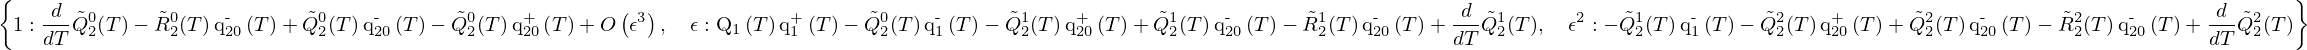

In [20]:
diQ2_dt_by_order = diQ2dt_expr.expand().collect(epsilon,evaluate=False)
diQ2_dt_by_order

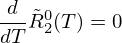

In [21]:
iR2_t0 = symbols('\\tilde{R}_2^0(t_0)')
Eq(diR2_dt_by_order[1].removeO(),0)


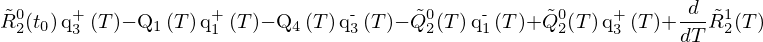

In [22]:
diR2_dt_by_order[epsilon].subs(iR20,iR2_t0)

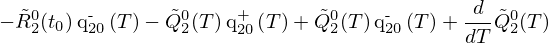

In [23]:
diQ2_dt_by_order[1].subs(iR20,iR2_t0).removeO()

The only non-divergenent solution of this ODE is constant. We set

$$
\widetilde{Q}^0_2(T) = \frac{q_{20}^-(t_0)}{q_{20}^-(t_0) + q_{20}^+(t_0)}\widetilde{R}^0_2(t_0)
$$
to match the outer solution

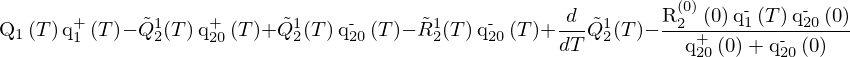

In [24]:
iQ21ode = diQ2_dt_by_order[epsilon].subs(iQ20,Q20_solution[0].subs(t,0))
iQ21ode

In [25]:
#dsolve(iQ21ode,iQ21)